In [1]:
import pandas as pd
import numpy as np

# Graphical presentation
from matplotlib import pyplot as plt

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Imbalanced data
from imblearn.over_sampling import SMOTE

#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score,train_test_split
df = pd.read_csv('C:\\Users\\Yaswanth\\Desktop\\DSP\\Banksegmentation.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [2]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [3]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
df.shape

(6362620, 11)

In [7]:
newdf = df.drop(columns = ['nameOrig','nameDest'])
newdf.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [8]:
newdf.shape

(6362620, 9)

In [9]:
newdf.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


In [10]:
newdf['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [11]:
newdf['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [12]:
X = newdf.iloc[:,[0,2,3,4,5,6]]
Y = newdf.iloc[:,-2]

In [13]:
notFraud  = newdf[newdf['isFraud'] == 0]

In [14]:
notFraud.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0
5,1,PAYMENT,7817.71,53860.0,46042.29,0.0,0.0,0,0
6,1,PAYMENT,7107.77,183195.0,176087.23,0.0,0.0,0,0


In [15]:
fraud = newdf[newdf['isFraud']==1]
fraud.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,181.0,0.0,0.0,0.0,1,0
3,1,CASH_OUT,181.0,181.0,0.0,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,2806.0,0.0,0.0,0.0,1,0
252,1,CASH_OUT,2806.0,2806.0,0.0,26202.0,0.0,1,0
680,1,TRANSFER,20128.0,20128.0,0.0,0.0,0.0,1,0


In [16]:
# spliting data into 80:20

X_train,X_test,Y_train,Y_test=train_test_split(X, Y, train_size=0.8,  random_state=100)

In [17]:
X_train.shape

(5090096, 6)

In [18]:
X_test.shape

(1272524, 6)

In [19]:
Y_train.shape

(5090096,)

In [20]:
Y_train.value_counts()

0    5083512
1       6584
Name: isFraud, dtype: int64

In [21]:
Y_test.shape

(1272524,)

In [22]:
Y_test.value_counts()

0    1270895
1       1629
Name: isFraud, dtype: int64

In [23]:
smt = SMOTE(k_neighbors=1)
X_train_sm, Y_train_sm = smt.fit_resample(X_train, Y_train)
Y_train_sm.value_counts()

1    5083512
0    5083512
Name: isFraud, dtype: int64

In [24]:
smt = SMOTE(k_neighbors=1)
X_test_sm, Y_test_sm = smt.fit_resample(X_test, Y_test)
Y_test_sm.value_counts()

1    1270895
0    1270895
Name: isFraud, dtype: int64

In [25]:
abs(X_test_sm)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,279.0,1.719695e+05,1.056977e+07,1.074174e+07,2.056990e+06,1.885020e+06
1,156.0,1.443491e+05,4.854639e+06,4.998988e+06,2.367885e+05,9.243944e+04
2,8.0,1.546123e+05,1.245046e+07,1.260507e+07,2.443607e+05,3.242946e+05
3,384.0,9.104746e+04,1.162200e+04,0.000000e+00,2.060233e+06,2.151280e+06
4,201.0,1.206961e+05,7.843000e+04,1.991260e+05,1.038196e+06,9.175002e+05
...,...,...,...,...,...,...
2541785,213.0,5.932978e+05,5.932978e+05,0.000000e+00,2.679970e+06,3.273268e+06
2541786,321.0,4.461876e+05,4.461876e+05,0.000000e+00,0.000000e+00,4.461876e+05
2541787,309.0,6.928897e+05,6.928897e+05,0.000000e+00,0.000000e+00,0.000000e+00
2541788,199.0,4.984770e+05,4.984770e+05,0.000000e+00,0.000000e+00,4.729628e+05


In [26]:
abs(Y_test_sm)

0          0
1          0
2          0
3          0
4          0
          ..
2541785    1
2541786    1
2541787    1
2541788    1
2541789    1
Name: isFraud, Length: 2541790, dtype: int64

In [27]:
from sklearn import preprocessing
from sklearn import utils

model = LogisticRegression()
print(model)

model = model.fit(X_train,Y_train )
ms = model.score(X_train,Y_train)
print("model score::",ms)

probability = model.predict_proba(X_test)
print(probability)
#print("*" * 100)
print("Confusion Matrix")
predicted = model.predict(X_test)
print(metrics.confusion_matrix(Y_test , predicted))

LogisticRegression()
model score:: 0.998251702914837
[[1.00000000e+000 1.56933018e-132]
 [1.00000000e+000 1.35316778e-075]
 [1.00000000e+000 1.75544505e-141]
 ...
 [9.99325424e-001 6.74576078e-004]
 [9.99999269e-001 7.31319408e-007]
 [9.84337668e-001 1.56623322e-002]]
Confusion Matrix
[[1269584    1311]
 [    925     704]]


In [28]:
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270895
           1       0.35      0.43      0.39      1629

    accuracy                           1.00   1272524
   macro avg       0.67      0.72      0.69   1272524
weighted avg       1.00      1.00      1.00   1272524



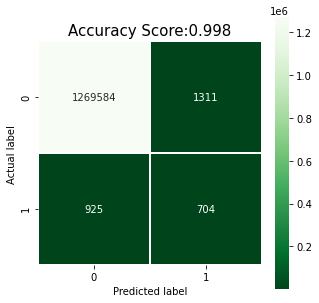

In [29]:
import seaborn as sns
cm = metrics.confusion_matrix(Y_test , predicted)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.8, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

all_sample_title = 'Accuracy Score:{:0.3f}'.format(ms)
plt.title(all_sample_title, size = 15);

0.8852274600612261


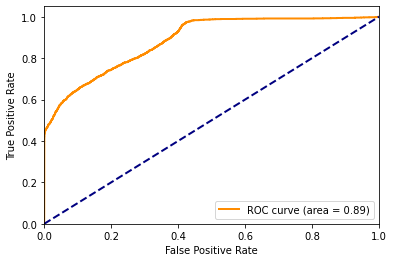

In [30]:
from sklearn import metrics
preds = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, preds)
auc = metrics.auc(fpr,tpr)
print(auc)
plt.figure()
fpr
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [31]:
fraud.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,181.0,0.0,0.0,0.0,1,0
3,1,CASH_OUT,181.0,181.0,0.0,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,2806.0,0.0,0.0,0.0,1,0
252,1,CASH_OUT,2806.0,2806.0,0.0,26202.0,0.0,1,0
680,1,TRANSFER,20128.0,20128.0,0.0,0.0,0.0,1,0


In [32]:
dfinput = fraud.iloc[:,[0,2,3,4,5,6]]
dfoutput = fraud.iloc[:,-2]

In [33]:
dfinput_train,dfinput_test,dfoutput_train,dfoutput_test=train_test_split(dfinput, dfoutput, train_size=0.8,  random_state=100)

In [34]:
dfinput_train.shape

(6570, 6)

In [35]:
dfoutput_train.value_counts()

1    6570
Name: isFraud, dtype: int64

In [36]:
%whos

Variable             Type                  Data/Info
----------------------------------------------------
LogisticRegression   type                  <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
SMOTE                ABCMeta               <class 'imblearn.over_sam<...>pling._smote.base.SMOTE'>
X                    DataFrame                      step      amount<...>6362620 rows x 6 columns]
X_test               DataFrame                      step     amount <...>1272524 rows x 6 columns]
X_test_sm            DataFrame                      step        amou<...>2541790 rows x 6 columns]
X_train              DataFrame                      step     amount <...>5090096 rows x 6 columns]
X_train_sm           DataFrame                       step         am<...>0167024 rows x 6 columns]
Y                    Series                0          0\n1          <...>th: 6362620, dtype: int64
Y_test               Series                3763599    0\n1595120    <...>th: 1272524, dtype: int64
Y_t

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)  # 8 components and check with 2
Y_sklearn = sklearn_pca.fit_transform(X)

In [38]:
sklearn_pca.explained_variance_ratio_

array([0.59007217, 0.39557502])

In [39]:
print(abs(sklearn_pca.components_ ))

[[7.25795980e-07 4.65180300e-02 9.44876008e-02 9.60034284e-02
  6.72195002e-01 7.26529688e-01]
 [5.05858099e-07 1.05452349e-02 6.96261324e-01 7.04848340e-01
  7.95907696e-02 1.09375927e-01]]


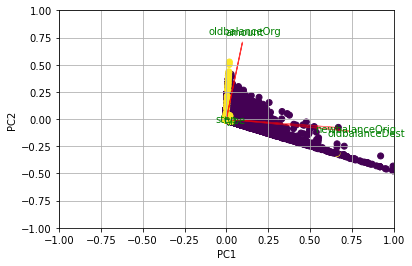

In [40]:
## biplot
import numpy as np
import matplotlib.pyplot as plt
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = Y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(Y_sklearn[:,0:2],np.transpose(sklearn_pca.components_[0:2, :]), labels=['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
        'oldbalanceDest', 'newbalanceDest'  ])                 
                                                           

plt.show()